# **LetsGrowMore- Virtual Internship Program (VIP)- Data Science**

Task 4 :- *Prediction using Decision Tree Algorithm*

Author : **Aniruddha Shinde**

Importing the required libraries

In [19]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

**Fetching data**

In [20]:
iris=pd.read_csv('/content/iris_csv - Copy.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Visualizing** 

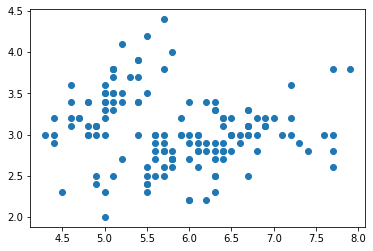

In [24]:
plt.scatter(iris['sepal_length'],iris['sepal_width'])

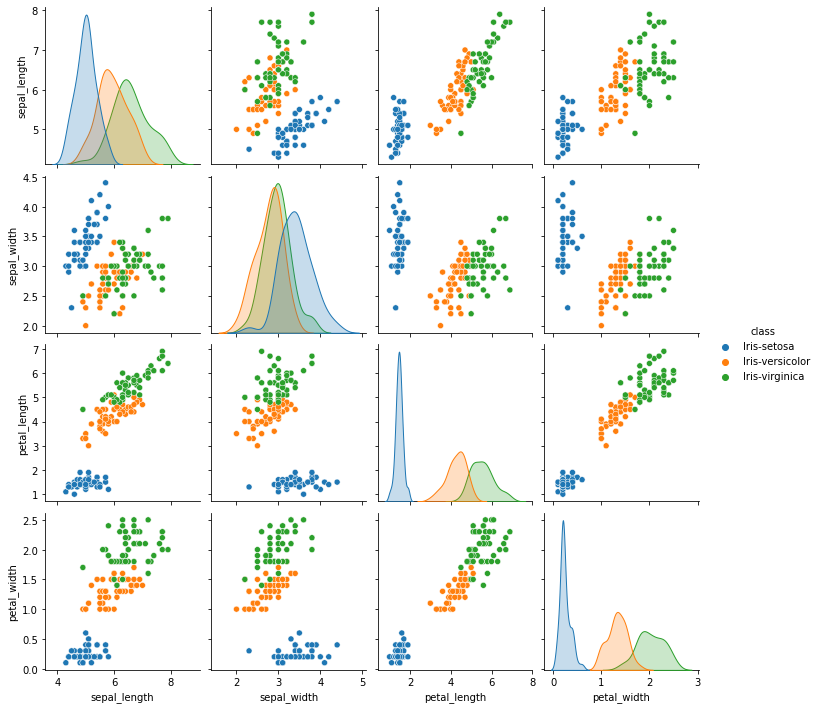

In [25]:
sns.pairplot(iris, hue='class')

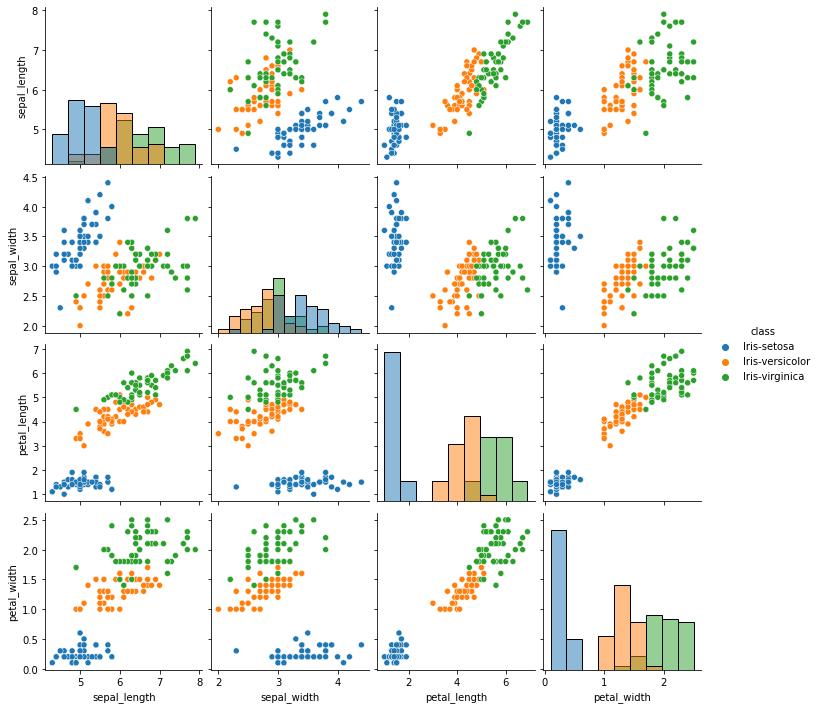

In [26]:
sns.pairplot(iris, hue="class", diag_kind="hist")

**correlation matrix**

In [27]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


**heat map**

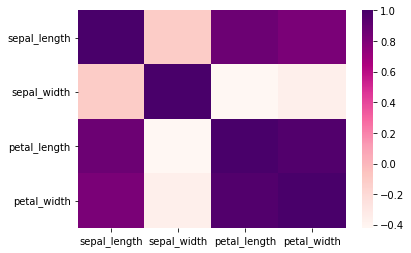

In [28]:
sns.heatmap(iris.corr(), cmap="RdPu")

**data preprocess**

In [31]:
target=iris['class']
df=iris.copy()
df=df.drop('class', axis=1)
df.shape

(150, 4)

In [32]:
x=iris.iloc[:, [0,1,2,3]].values
LaEn=LabelEncoder()
iris['class']=LaEn.fit_transform(iris['class'])
y=iris['class'].values
iris.shape

(150, 5)

**Spliting the data into Training and Testing set**

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Trainging set:",x_train.shape)
print("Testing set:",x_test.shape)

Trainging set: (120, 4)
Testing set: (30, 4)


**Defining Decision Tree Algorithm**

In [34]:
d_tree=DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
print("Decision Tree Classifier created!")

Decision Tree Classifier created!


# Visualization of trained model

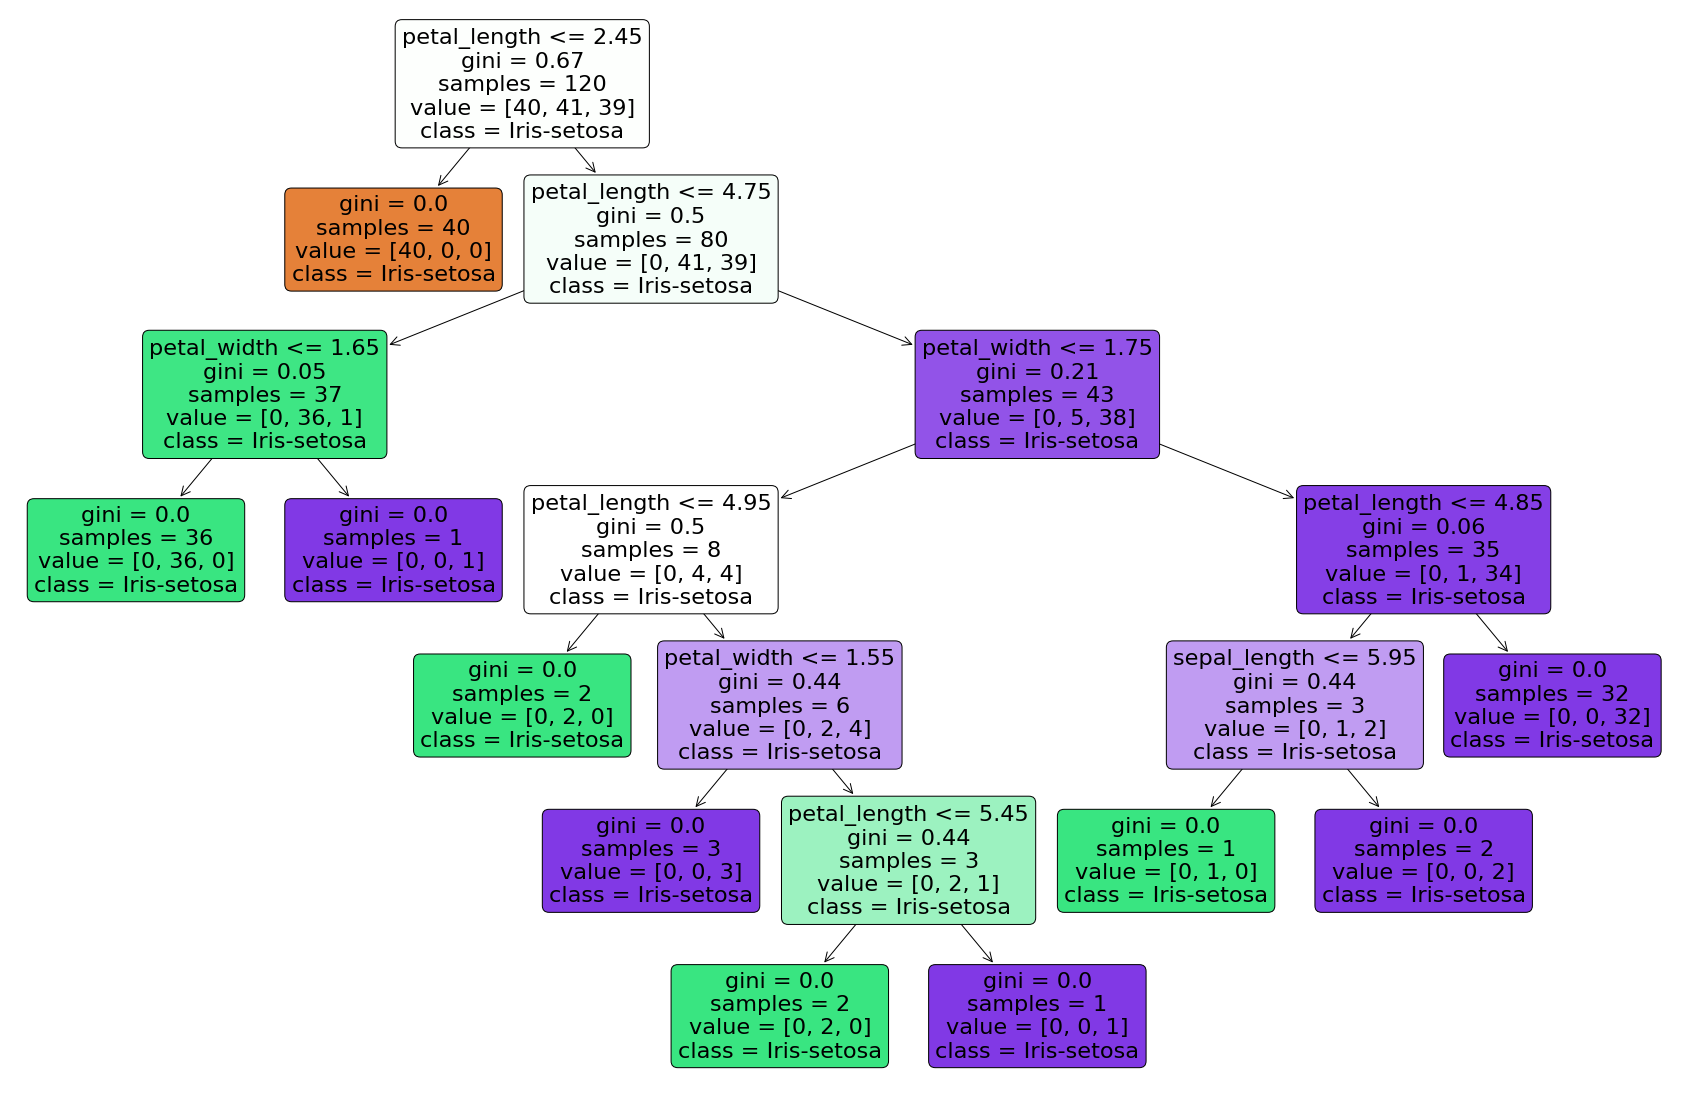

In [35]:
plt.figure(figsize=(30,20))
tree=plot_tree(d_tree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=target.values)

**Classification**

In [36]:
y_pred=d_tree.predict(x_test)
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Accuracy**



In [37]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Accuracy: 1.0


**Confusion matrix**

In [38]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])